### **Problem Statament**

**Predicting High-Income Individuals Using Support Vector Machines**

In [1]:
# Import Necessary Libraires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['figure.dpi'] = 300
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("/user/HS400/sb03414/mlmavericks_coursework/data/processed/census_income_SVM_MLP.csv")
df

,age,education,sex,hours-per-week,Income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-employed,workclass_State-gov,...,occupation_filtered_Prof-specialty,occupation_filtered_Protective-serv,occupation_filtered_Sales,occupation_filtered_Tech-support,region_Asia,region_Europe,region_Latin America,region_Middle East,region_North America,region_Unknown
0,-0.032695,1.102604,1,0.044626,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.759727,1.102604,1,-2.457673,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-0.104734,-0.398752,1,0.044626,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.975843,-1.149430,1,0.044626,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.825118,1.102604,0,0.044626,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41067,0.615650,1.477943,1,0.044626,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41068,-0.032695,1.102604,0,-0.326085,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
41069,1.768266,-0.398752,1,0.044626,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41070,0.327497,1.102604,1,0.044626,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41072 entries, 0 to 41071
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   age                                  41072 non-null  float64
 1   education                            41072 non-null  float64
 2   sex                                  41072 non-null  int64  
 3   hours-per-week                       41072 non-null  float64
 4   Income                               41072 non-null  int64  
 5   workclass_Federal-gov                41072 non-null  int64  
 6   workclass_Local-gov                  41072 non-null  int64  
 7   workclass_Private                    41072 non-null  int64  
 8   workclass_Self-employed              41072 non-null  int64  
 9   workclass_State-gov                  41072 non-null  int64  
 10  workclass_Unemployed                 41072 non-null  int64  
 11  workclass_Unknown           

In [4]:
df.describe()

,age,education,sex,hours-per-week,Income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-employed,workclass_State-gov,...,occupation_filtered_Prof-specialty,occupation_filtered_Protective-serv,occupation_filtered_Sales,occupation_filtered_Tech-support,region_Asia,region_Europe,region_Latin America,region_Middle East,region_North America,region_Unknown
count,4.107200e+04,4.107200e+04,41072.000000,4.107200e+04,41072.000000,41072.000000,41072.000000,41072.000000,41072.000000,41072.000000,...,41072.000000,41072.000000,41072.000000,41072.000000,41072.000000,41072.000000,41072.000000,41072.000000,41072.000000,41072.000000
mean,-6.349074e-17,2.162491e-17,0.652050,-7.730906e-17,0.233590,0.033600,0.071679,0.659744,0.127727,0.046577,...,0.132134,0.022741,0.110781,0.032236,0.022351,0.018918,0.045238,0.001437,0.891288,0.020768
std,1.000012e+00,1.000012e+00,0.476326,1.000012e+00,0.423119,0.180198,0.257959,0.473801,0.333790,0.210733,...,0.338640,0.149077,0.313865,0.176629,0.147824,0.136237,0.207827,0.037874,0.311281,0.142610
min,-1.617541e+00,-3.401464e+00,0.000000,-3.569805e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.251183e-01,-3.987520e-01,0.000000,-1.407293e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.047339e-01,-2.341300e-02,1.000000,4.462621e-02,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.876889e-01,7.272650e-01,1.000000,5.080149e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.641265e+00,2.228621e+00,1.000000,1.434792e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Target column distribution

target_col = 'Income'
print("\nTarget class distribution:")
print(df[target_col].value_counts())


Target class distribution:
Income
0    31478
1     9594
Name: count, dtype: int64


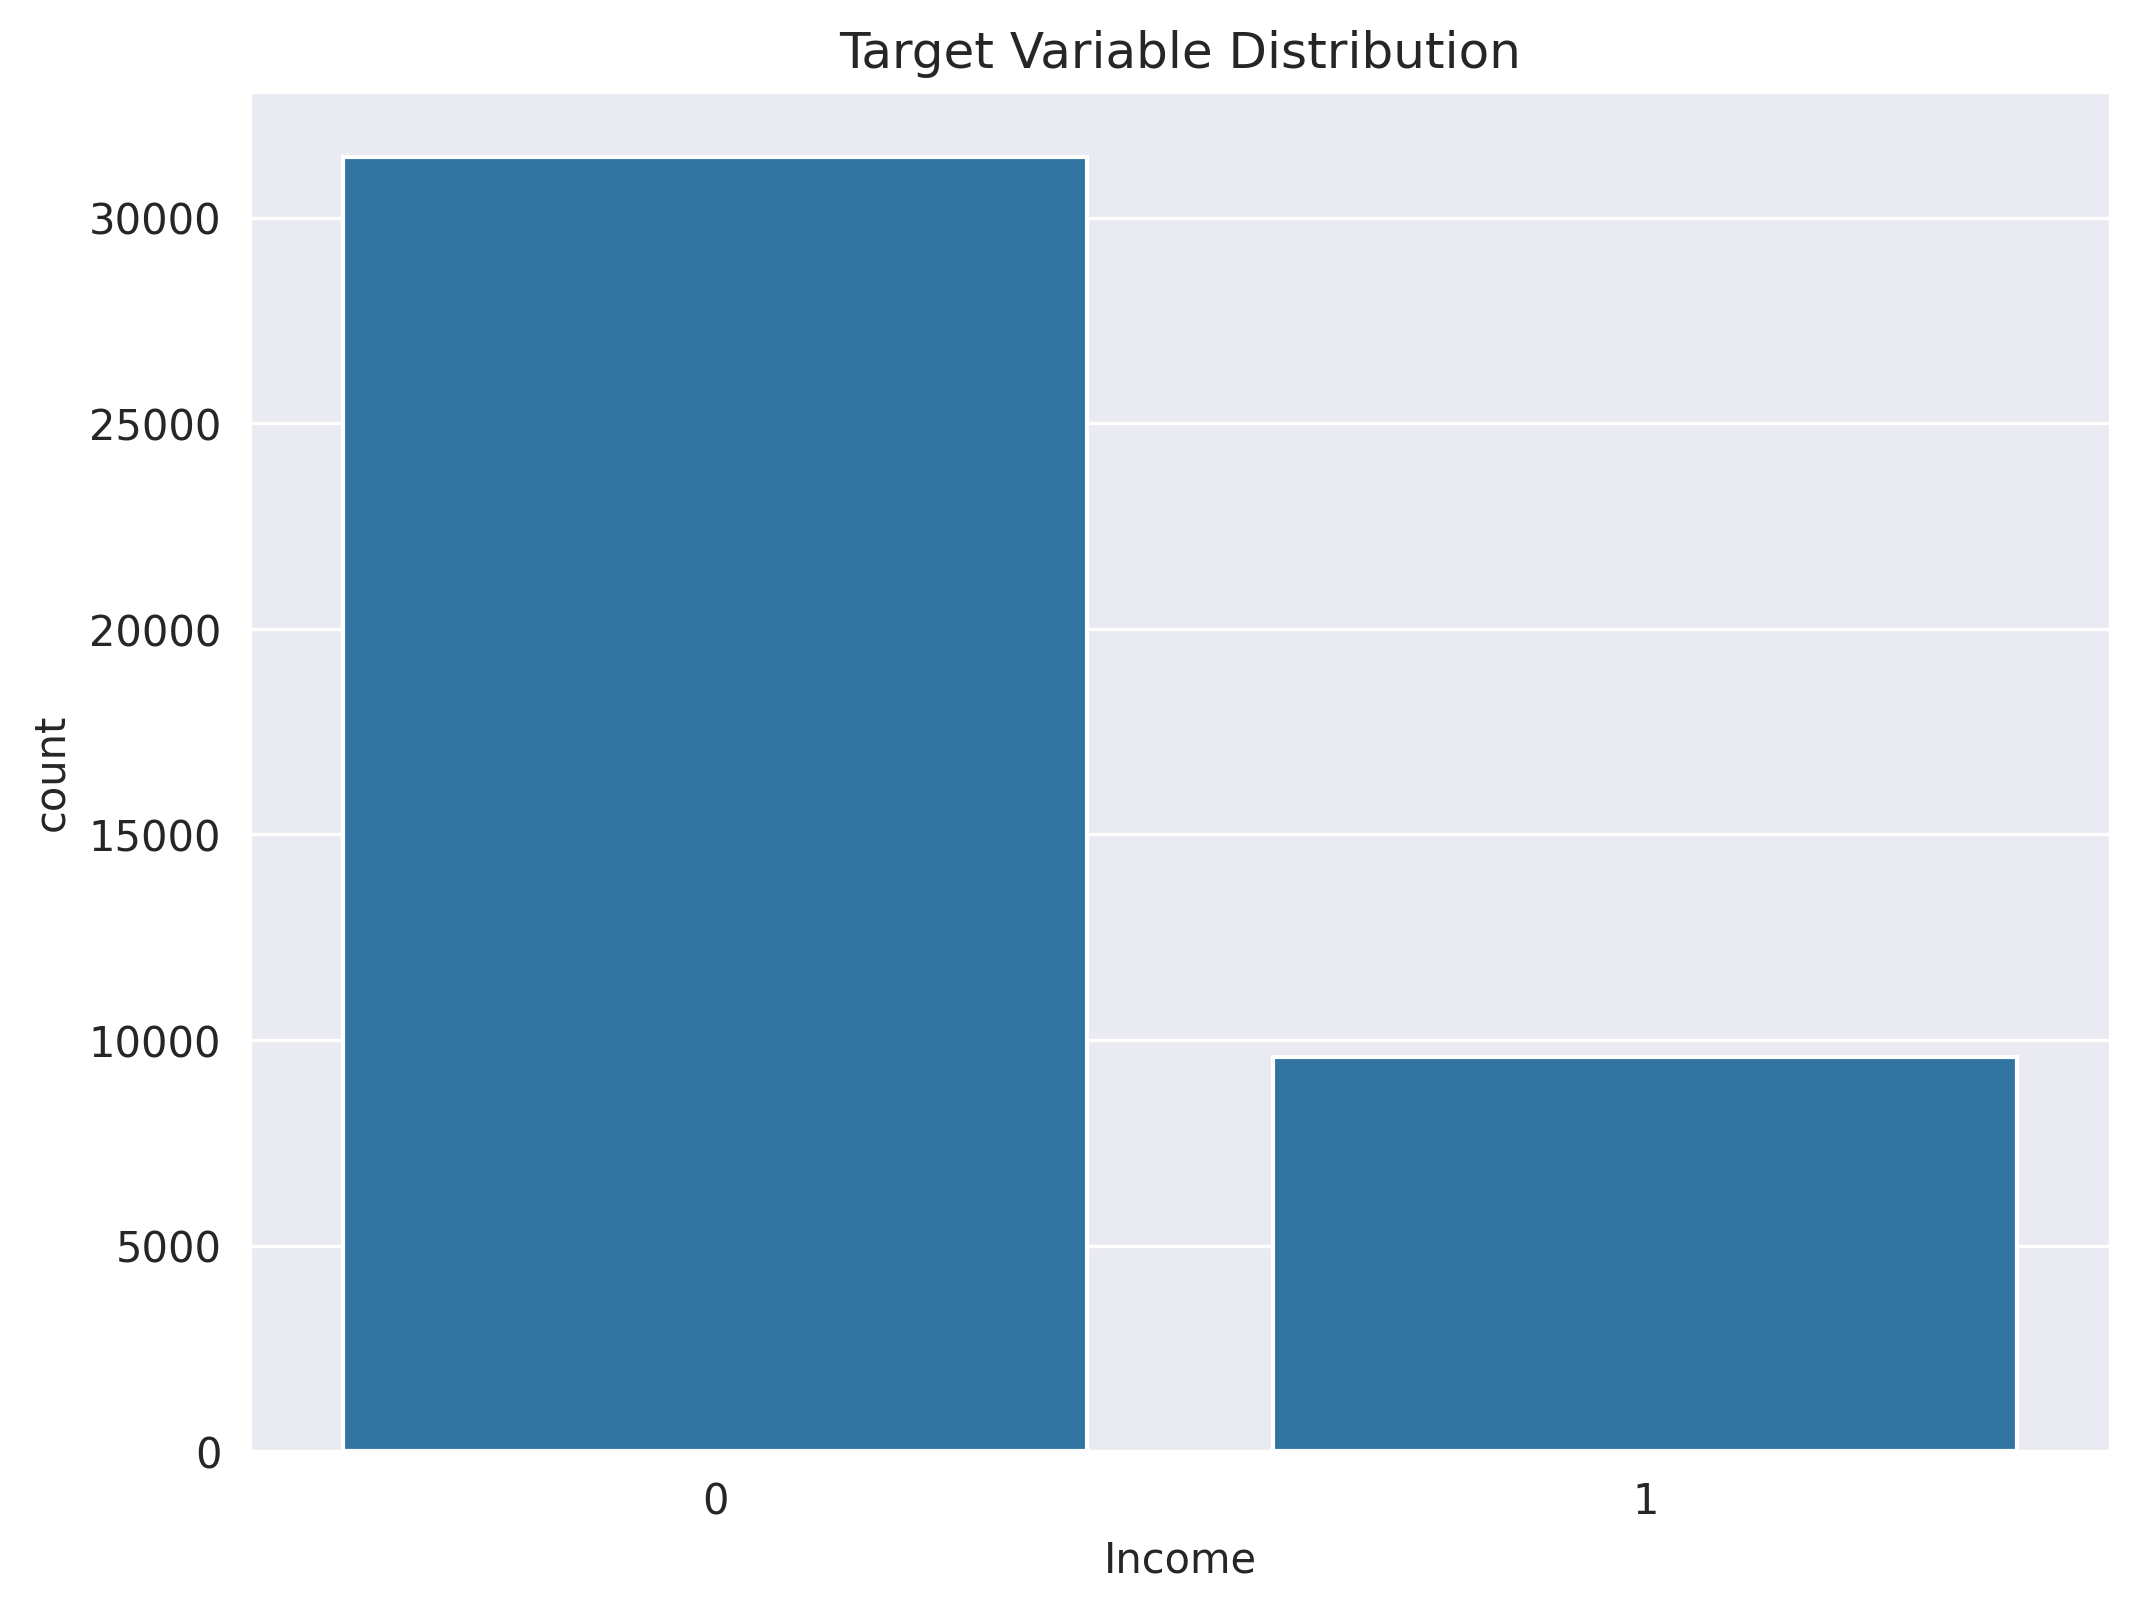

In [6]:
#  Plot target distribution
sns.countplot(x=target_col, data=df)
plt.title("Target Variable Distribution")
plt.show()

-  The target variable distribution chart reveals a significant class imbalance, with a much larger proportion of individuals earning ≤$50K (class 0) compared to those earning >$50K (class 1). This imbalance presents a challenge for classification models, as they tend to favor the majority class unless specifically tuned or balanced.

Features most correlated with target 'income':
marital-status_Married                 0.428190
relationship_Husband                   0.381453
education                              0.321525
marital-status_Single                  0.290761
occupation_filtered_Other              0.271232
hours-per-week                         0.234059
relationship_Own-child                 0.204980
age                                    0.203813
sex                                    0.199241
occupation_filtered_Exec-managerial    0.187582
occupation_filtered_Prof-specialty     0.185103
marital-status_Separated               0.180306
relationship_Not-in-family             0.177189
relationship_Unmarried                 0.147336
relationship_Wife                      0.130280
workclass_Self-employed                0.110952
race_Black                             0.092306
workclass_Private                      0.089945
relationship_Other-relative            0.089871
race_White                             0.

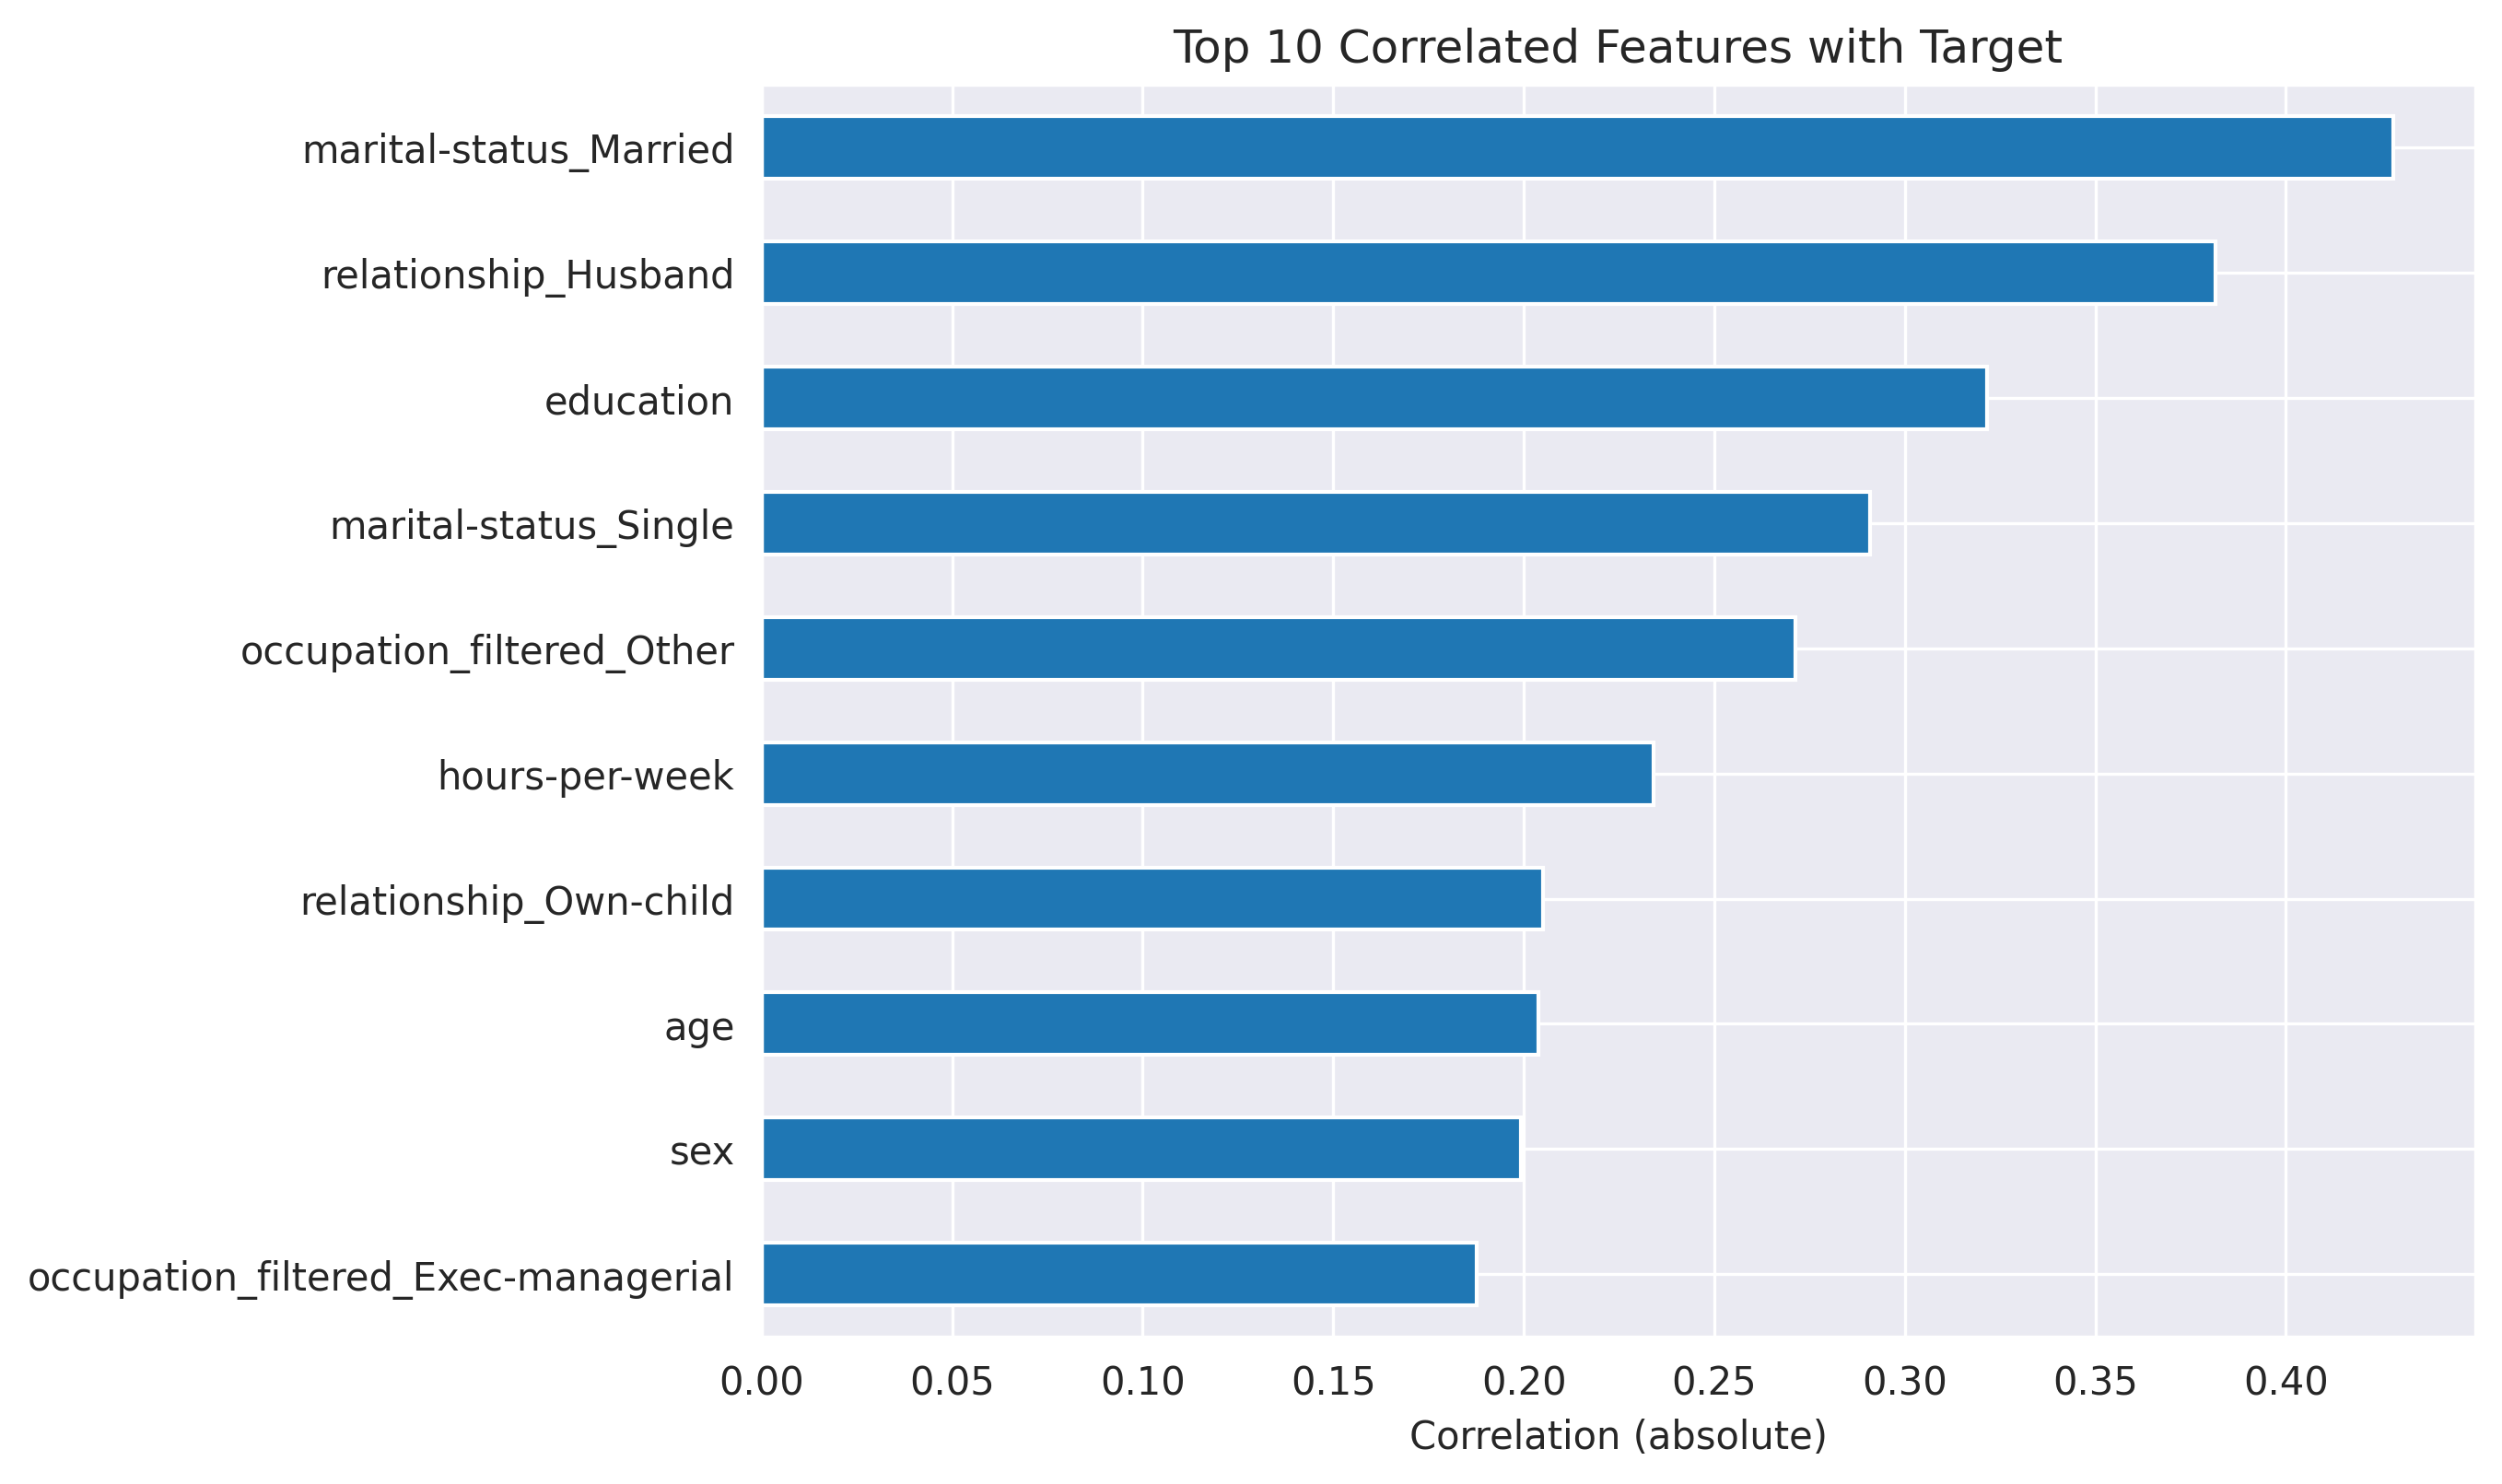

In [7]:
# Compute correlations with the target variable
target_corr = df.corr()['Income'].drop('Income') 

# Sort by absolute correlation
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

print("Features most correlated with target 'income':")
print(target_corr_sorted)

# Plot top N
top_n = 10
target_corr_sorted[:top_n].plot(kind='barh', title=f"Top {top_n} Correlated Features with Target")
plt.xlabel("Correlation (absolute)")
plt.gca().invert_yaxis()

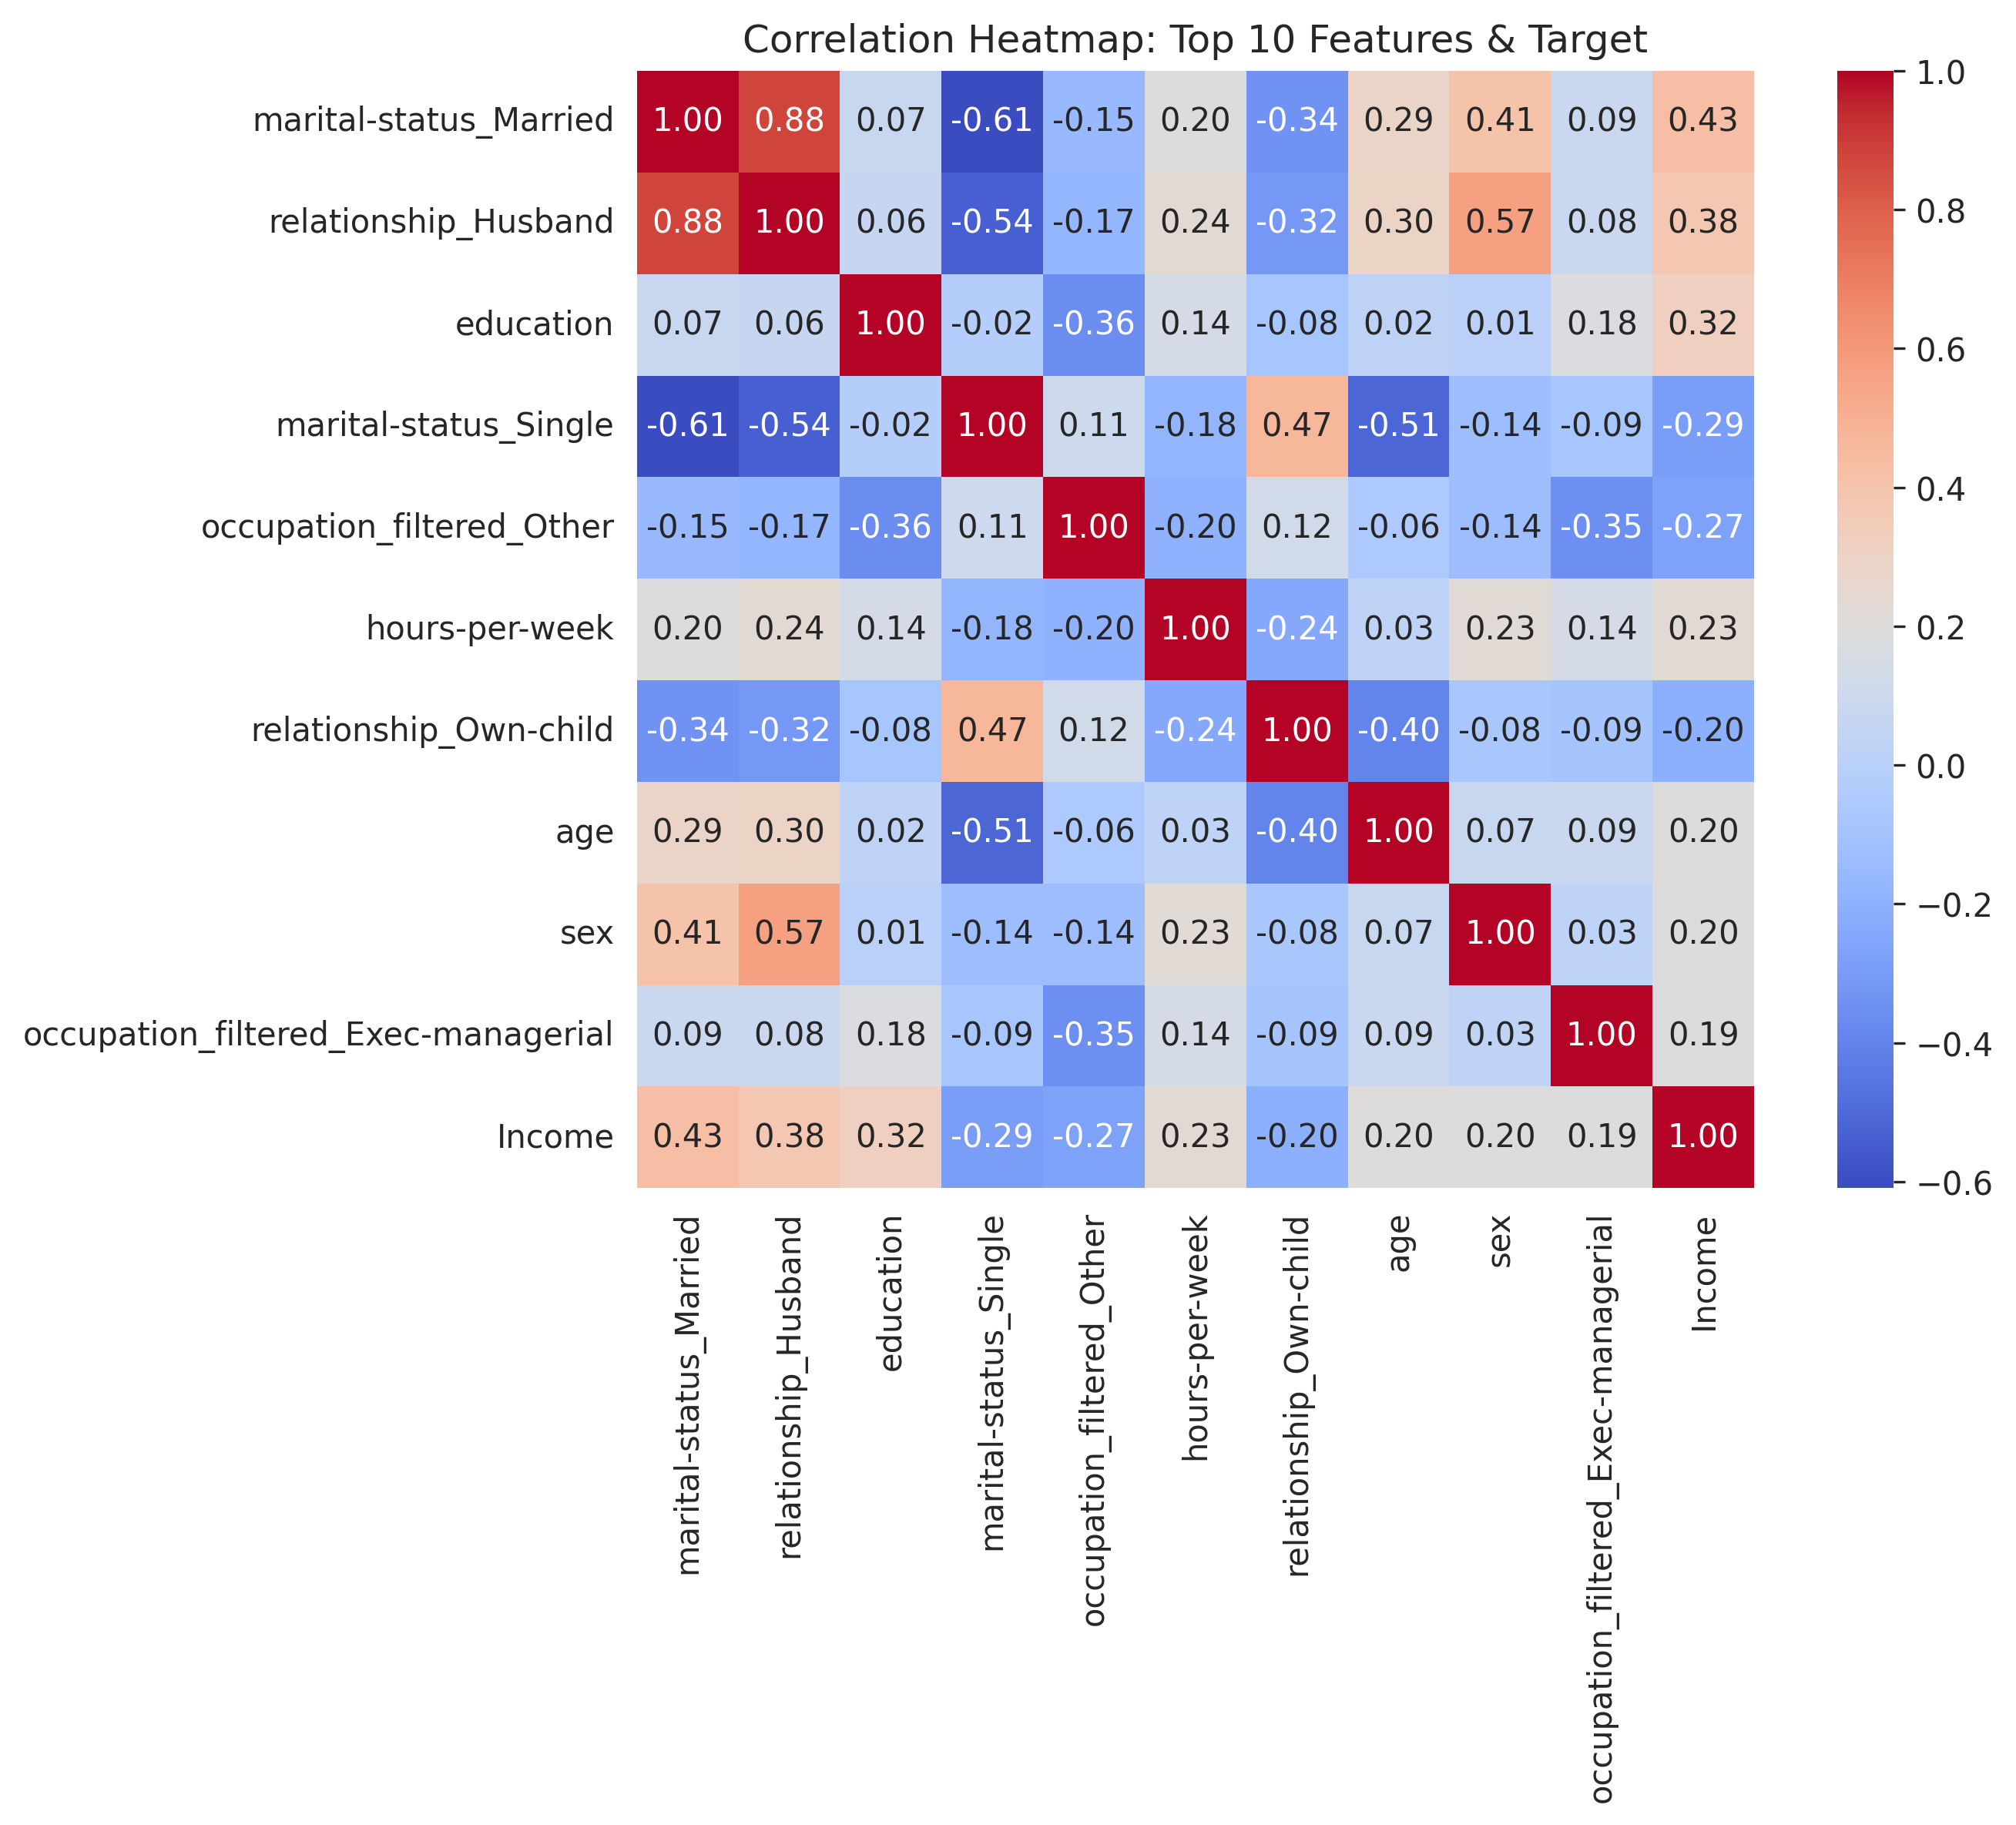

In [8]:
# Get top 10 correlated features with target
top_10_features = target_corr_sorted[:10].index.tolist()

# Create a subset with just those features + target
top_corr_df = df[top_10_features + ['Income']]

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap: Top 10 Features & Target")
plt.tight_layout()

In [9]:
# Separate features and target
X = df.drop(columns=['Income'])
y = df['Income']

#  Standardize all feature columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Training size: (32857, 39), Test size: (8215, 39)
Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      6296
           1       0.69      0.51      0.59      1919

    accuracy                           0.83      8215
   macro avg       0.78      0.72      0.74      8215
weighted avg       0.82      0.83      0.82      8215



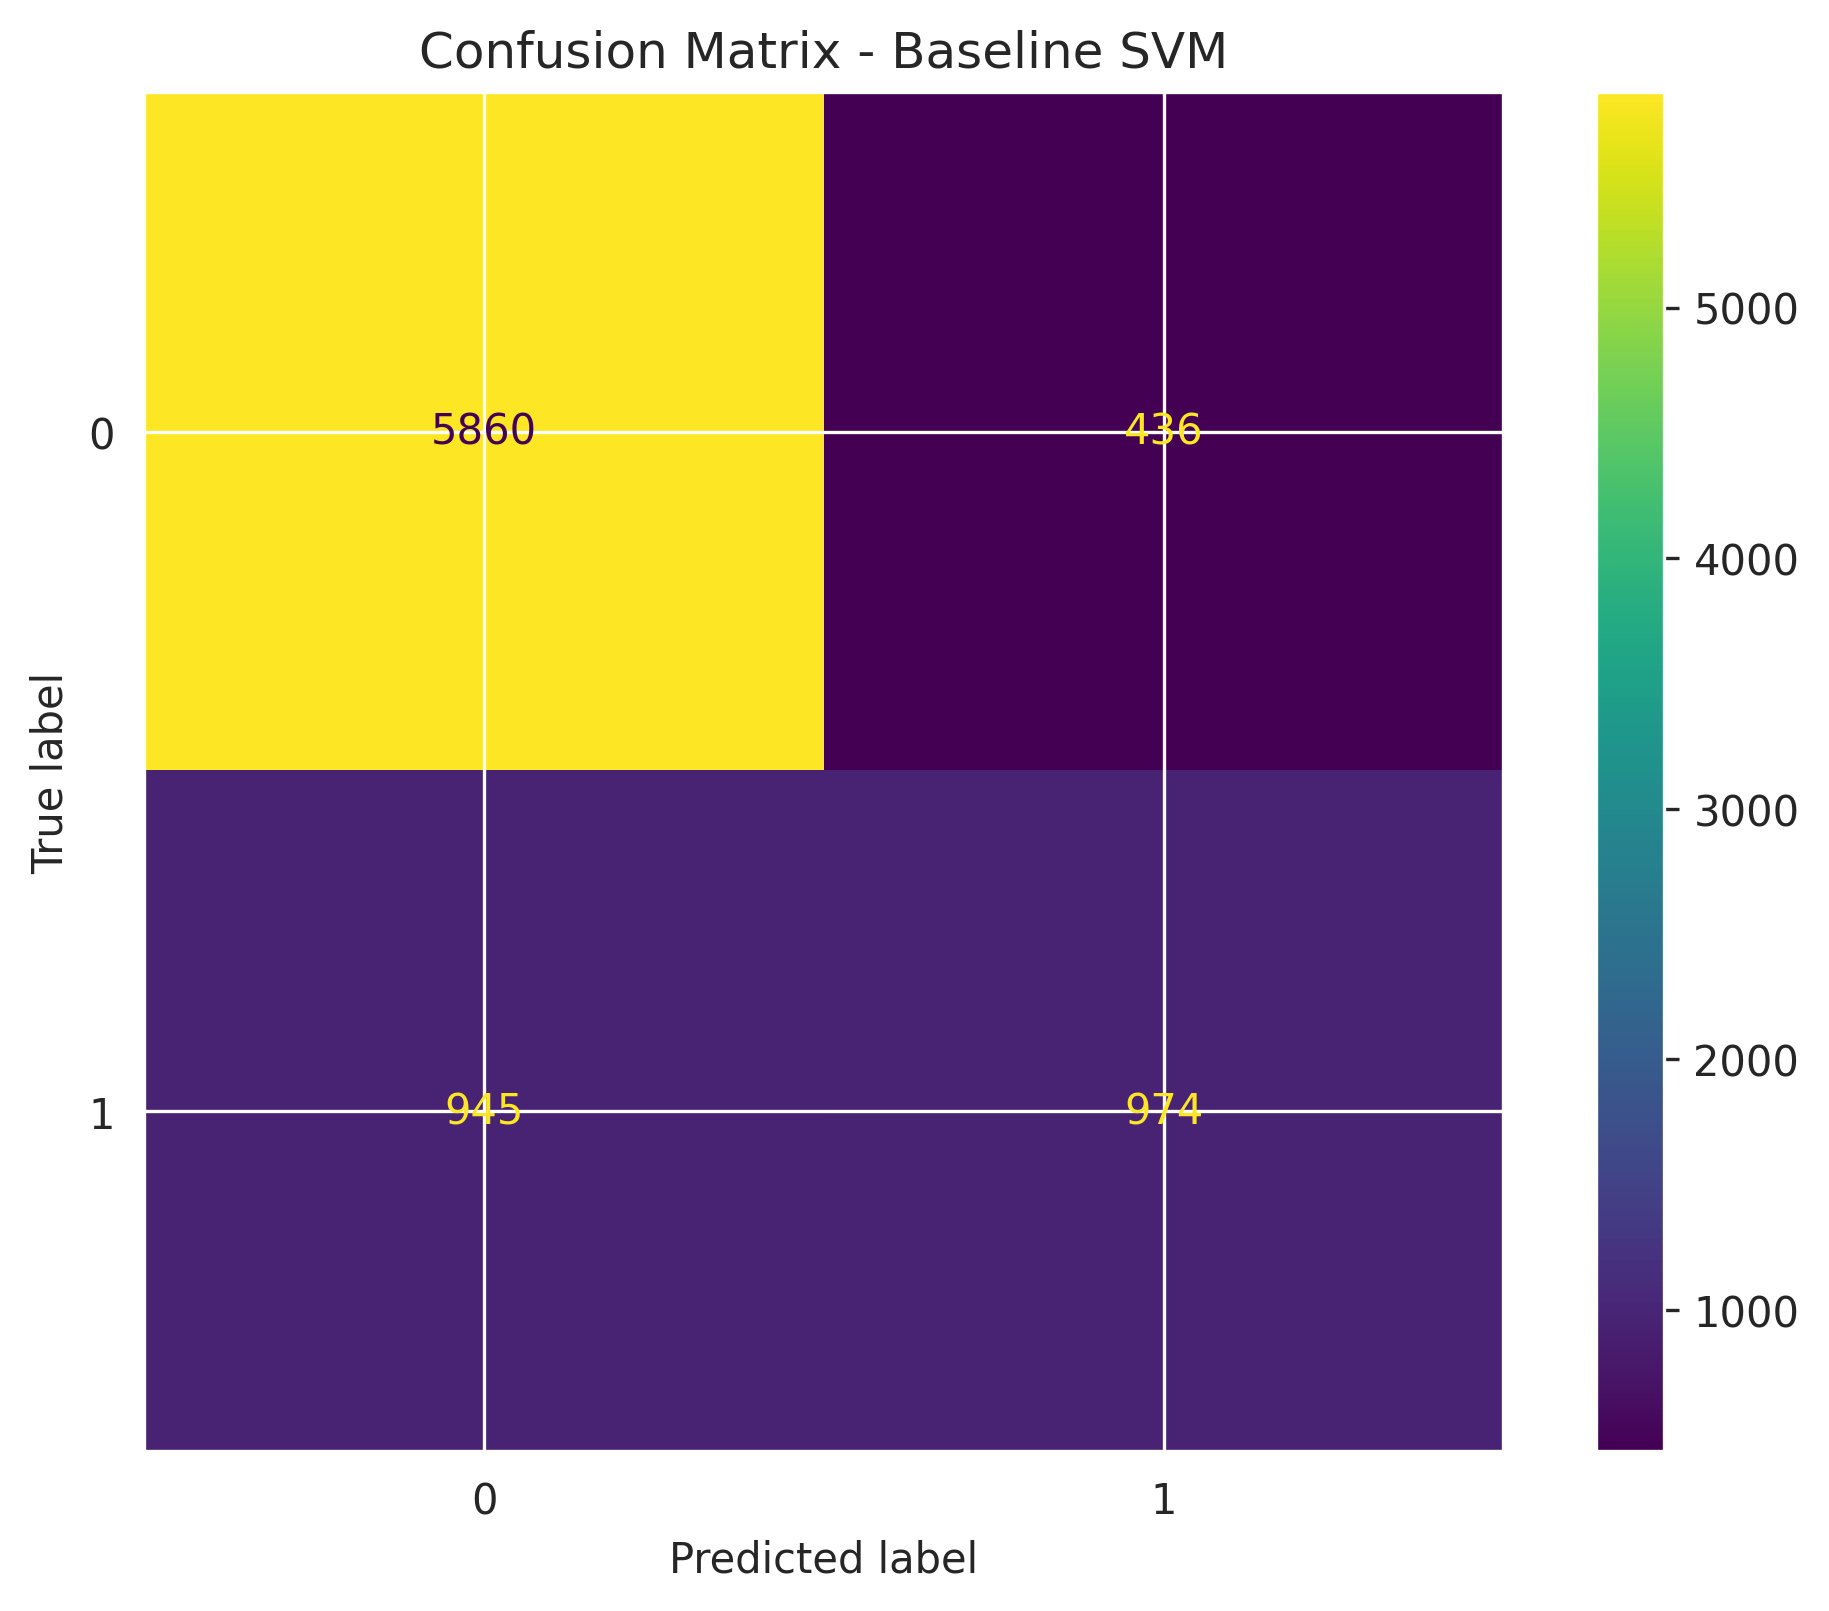

ROC AUC Score: 0.8498


In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training size: {X_train.shape}, Test size: {X_test.shape}")

# Train basic SVM with RBF kernel
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred = svm_clf.predict(X_test)

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Baseline SVM")
plt.show()

# ROC AUC
y_prob = svm_clf.decision_function(X_test)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

-  The confusion matrices provide insights into prediction accuracy. In the baseline model, while the model performs well on the majority class (class 0), it struggles with correctly identifying instances of class 1, as shown by a high number of false negatives.

In [11]:
# Define hyperparameter grid

param_grid = {
    'C': [0.1, 1],
    'gamma': ['scale', 0.01, 0.1],
    'kernel': ['rbf', 'linear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters from GridSearch:")
print(grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters from GridSearch:
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}



Classification Report (Tuned SVM):
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      6296
           1       0.70      0.52      0.60      1919

    accuracy                           0.84      8215
   macro avg       0.78      0.73      0.75      8215
weighted avg       0.83      0.84      0.83      8215

ROC AUC Score (Tuned): 0.8787


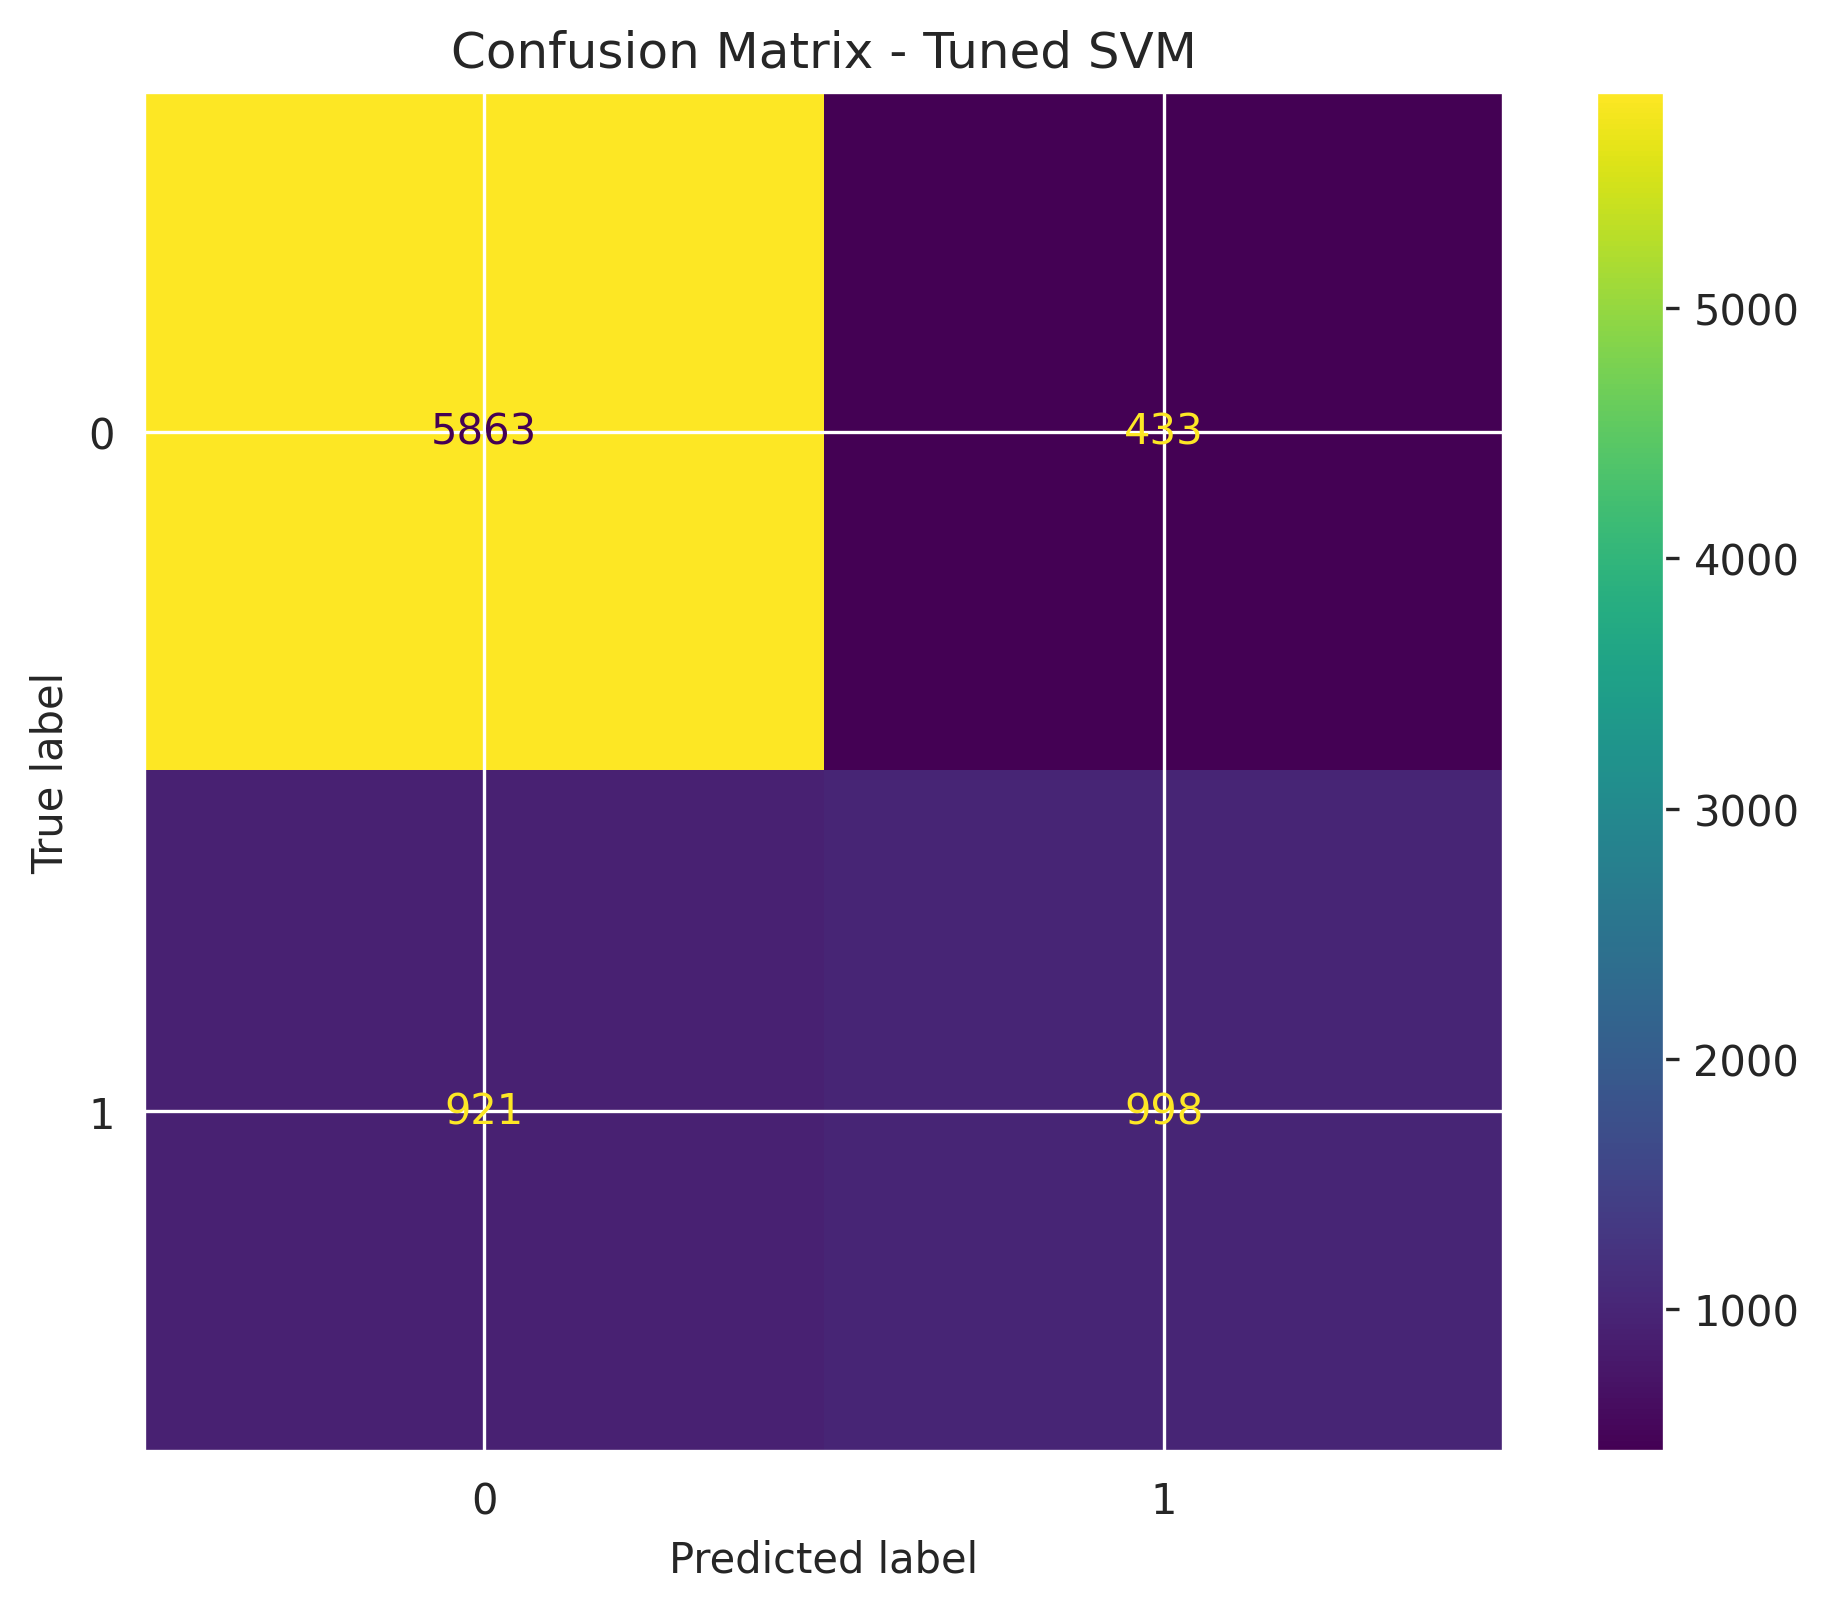

[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time= 1.3min
[CV] END ....................C=1, gamma=scale, kernel=linear; total time= 1.4min
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 1.2min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time= 1.5min
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time= 1.2min
[CV] END ....................C=1, gamma=scale, kernel=linear; total time= 1.5min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 1.4min
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time= 1.3min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 1.4min
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time= 1.3min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 2.8min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 2.9min
[CV] END ...................

In [12]:
# Get best model
best_svm = grid_search.best_estimator_

# Predictions
y_pred_best = best_svm.predict(X_test)

print("\nClassification Report (Tuned SVM):")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp.plot()
plt.title("Confusion Matrix - Tuned SVM")

# ROC AUC
y_prob_best = best_svm.decision_function(X_test)
roc_auc_best = roc_auc_score(y_test, y_prob_best)
print(f"ROC AUC Score (Tuned): {roc_auc_best:.4f}")

-  After hyperparameter tuning, the confusion matrix for the tuned model shows a slight improvement in correctly classifying high-income individuals, reducing false negatives and increasing true positives.

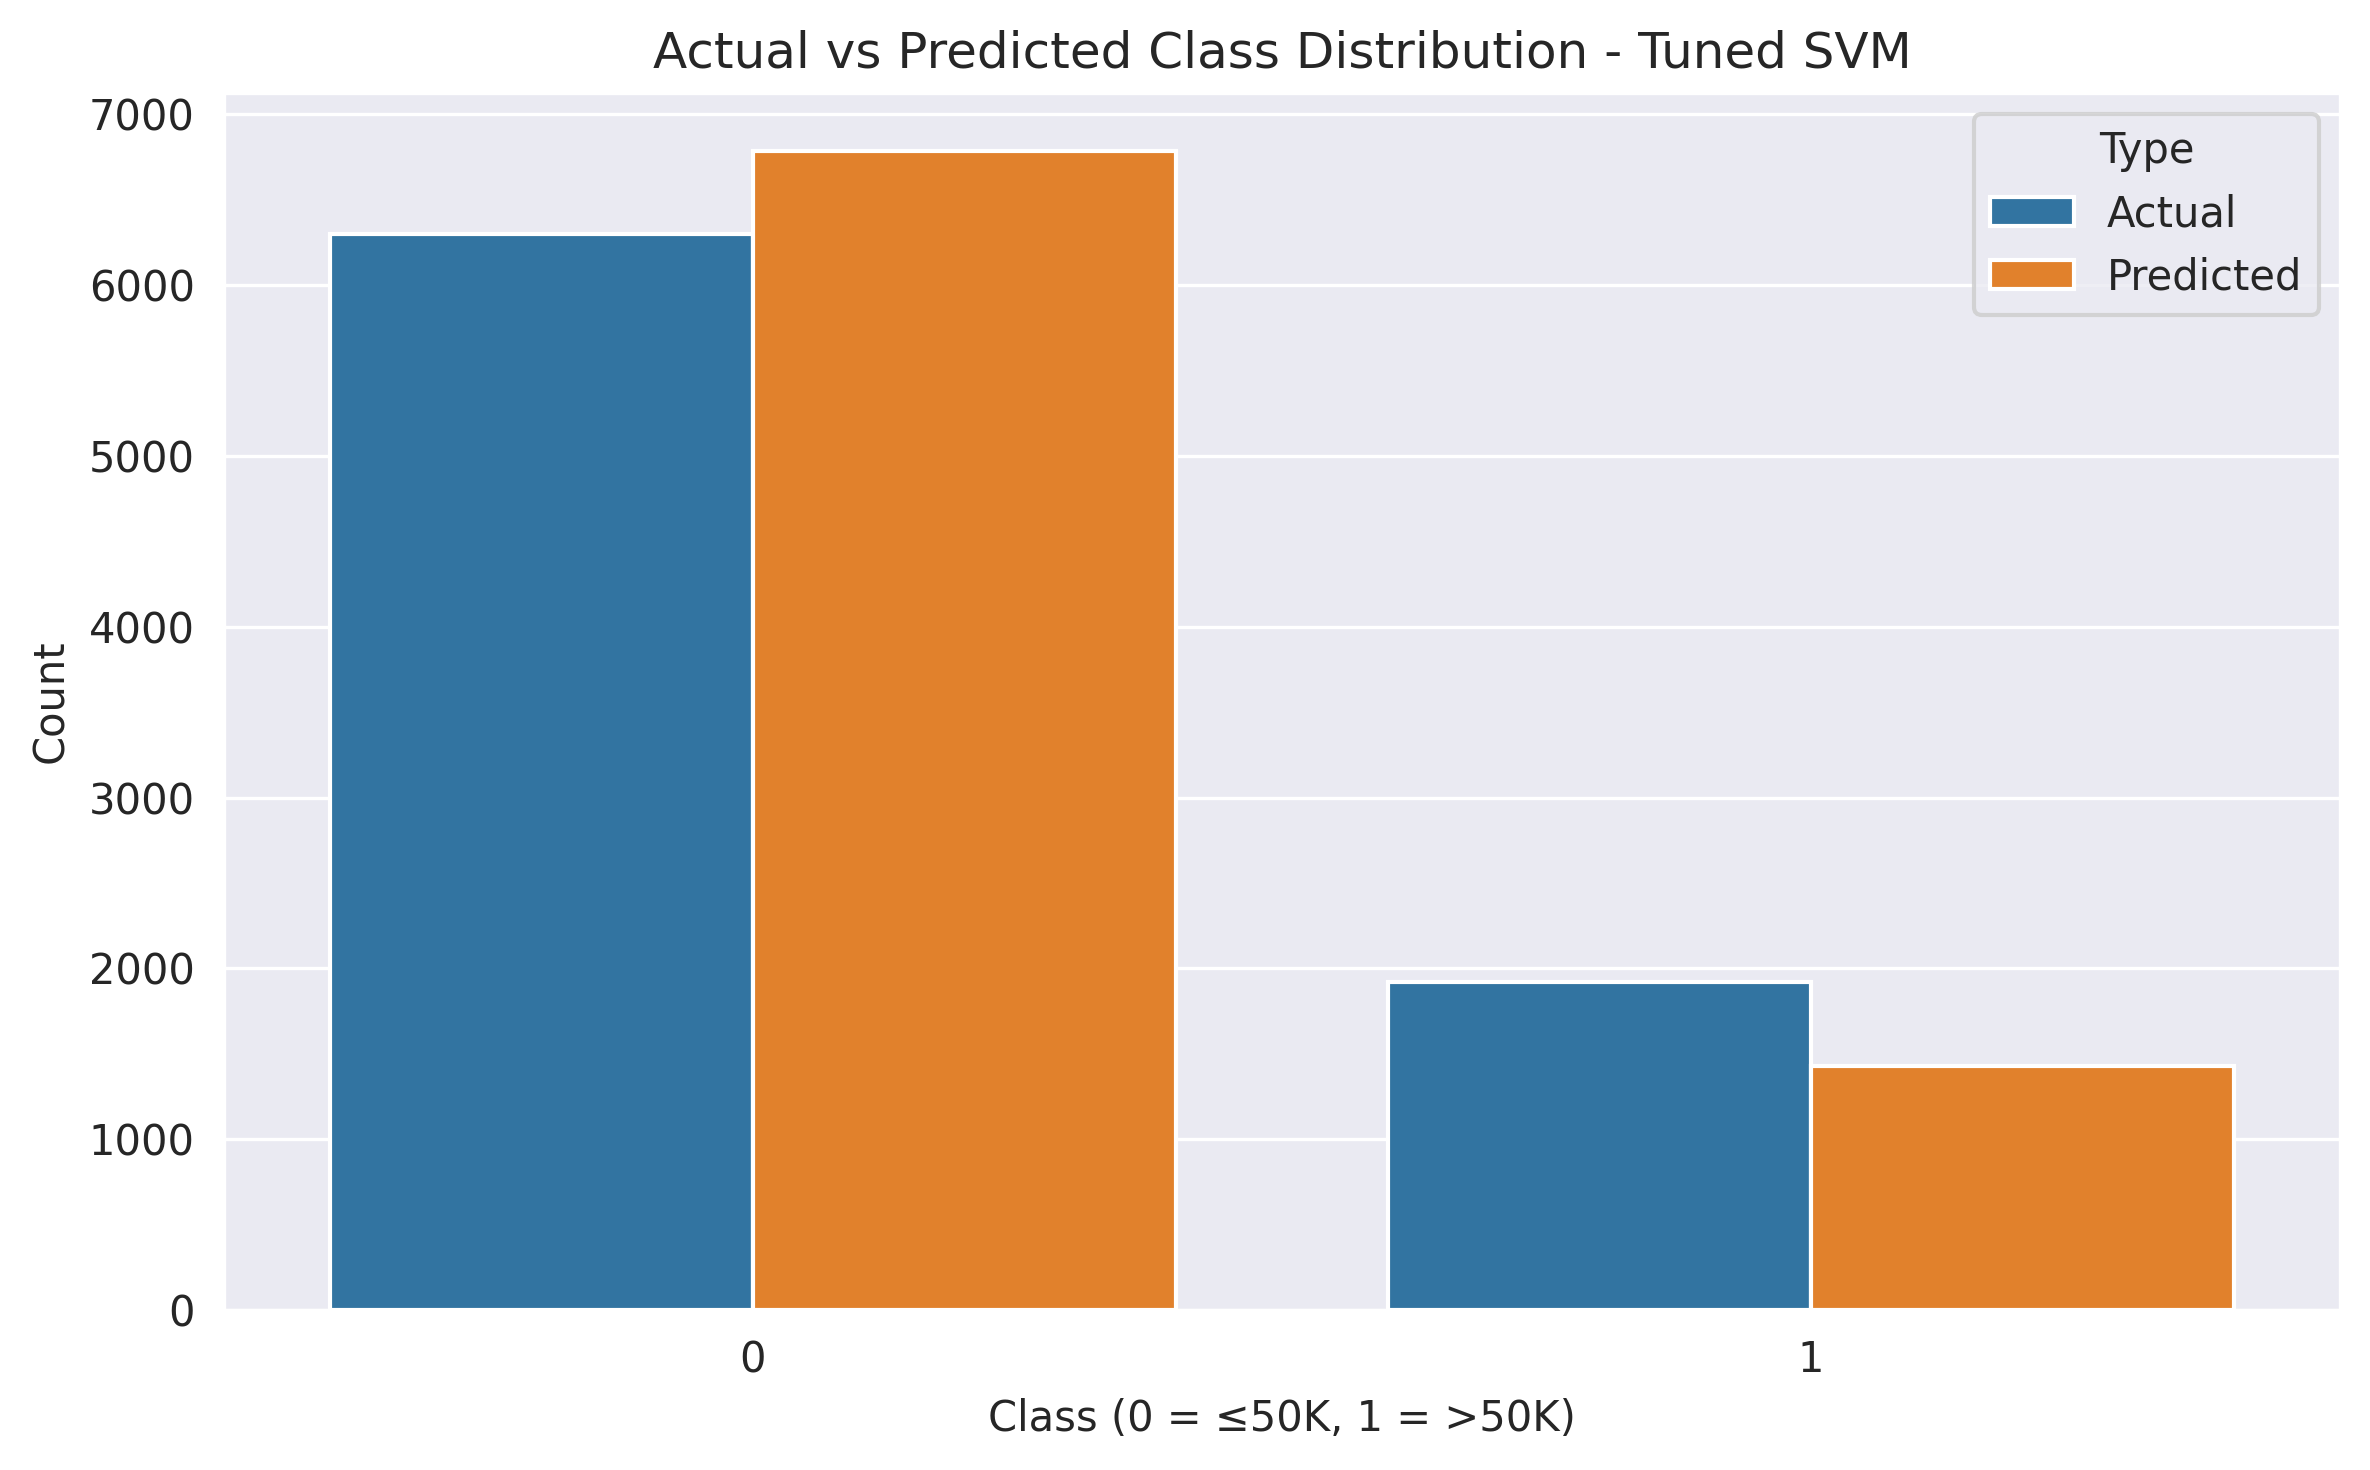

In [17]:
# Combine actual and predicted into a dataframe
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_best
})

# Melt the dataframe for side-by-side plotting
melted_df = comparison_df.melt(var_name='Type', value_name='Class')

plt.figure(figsize=(8, 5))
sns.countplot(data=melted_df, x='Class', hue='Type')
plt.title("Actual vs Predicted Class Distribution - Tuned SVM")
plt.xlabel("Class (0 = ≤50K, 1 = >50K)")
plt.ylabel("Count")
plt.grid(True, axis='y')
plt.tight_layout()

-  The actual vs predicted class distribution chart highlights how the tuned model still slightly overpredicts class 0 and underpredicts class 1, though the gap has narrowed compared to the baseline.

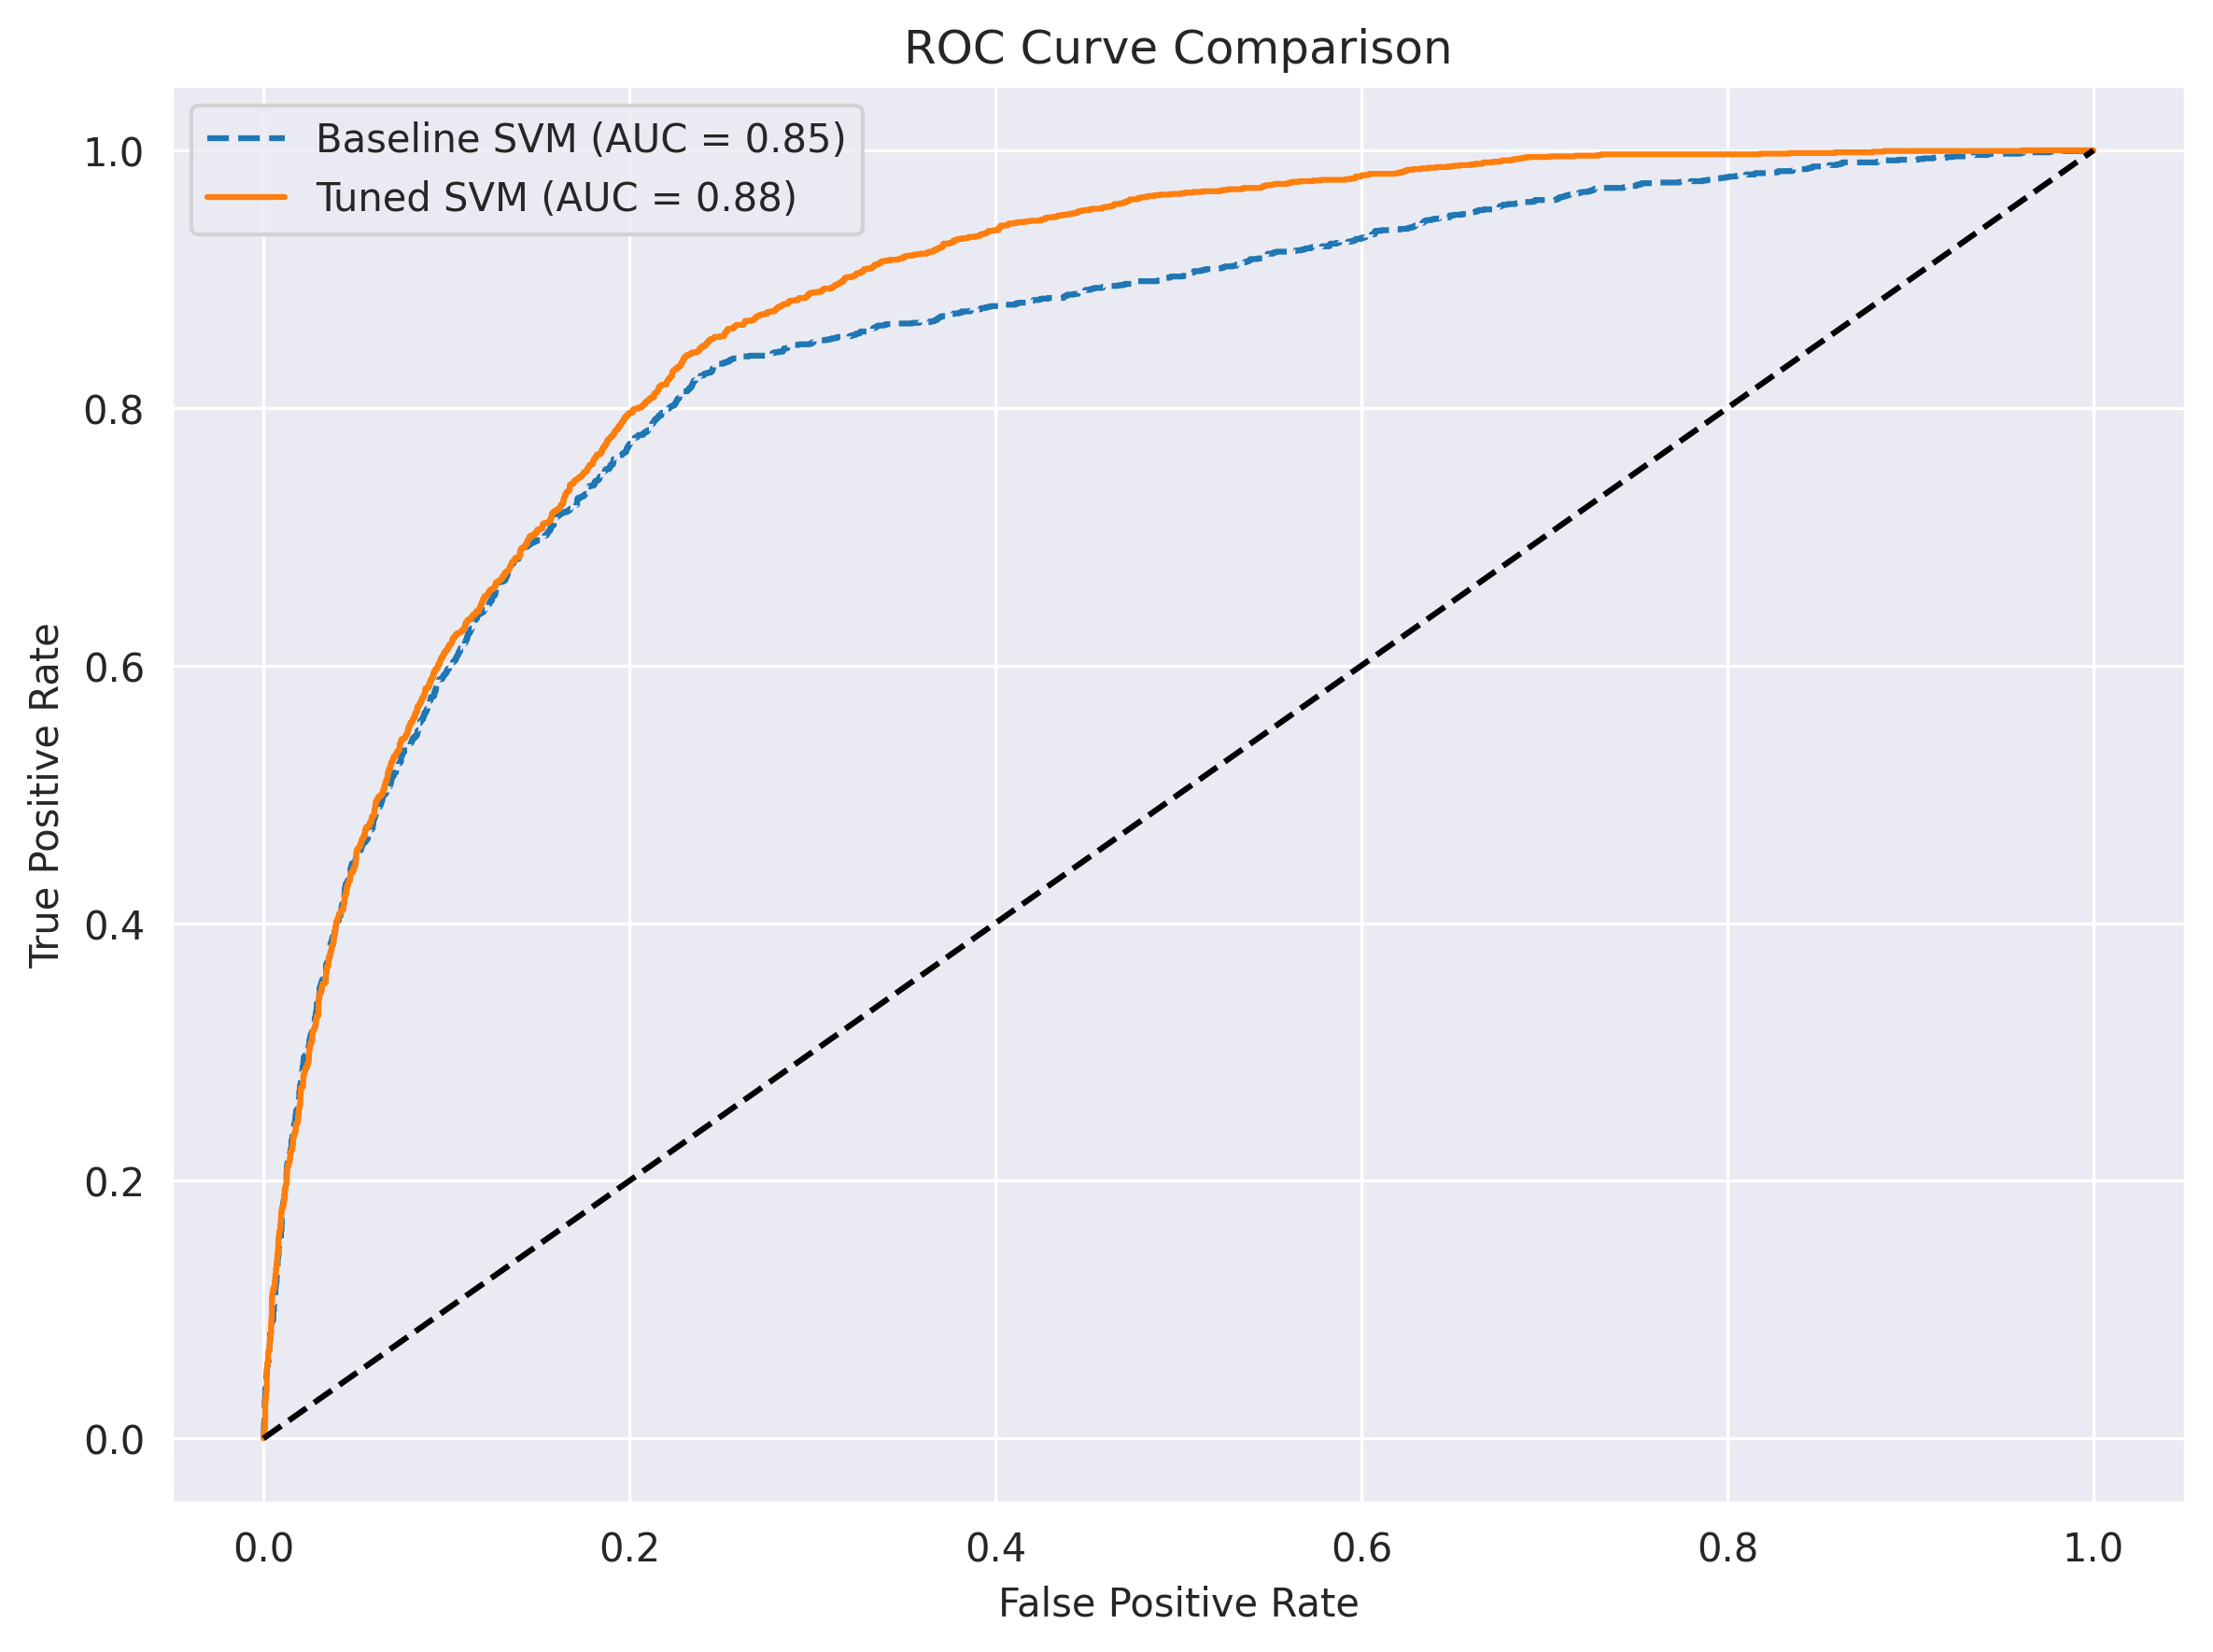

[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.8min
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 1.6min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 1.7min
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 1.6min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.8min
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 1.6min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 1.9min
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 1.4min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time= 2.0min
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 1.4min


In [13]:
# ROC Curve Comparison

fpr_base, tpr_base, _ = roc_curve(y_test, y_prob)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_base, tpr_base, label='Baseline SVM (AUC = {:.2f})'.format(roc_auc), linestyle='--')
plt.plot(fpr_tuned, tpr_tuned, label='Tuned SVM (AUC = {:.2f})'.format(roc_auc_best))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()

-  Lastly, the ROC curve comparison illustrates the enhanced discriminatory power of the tuned SVM, with its ROC AUC increasing from 0.85 to 0.88, indicating better class separability and improved overall performance.

In [18]:
import joblib

# Save the best estimator (tuned SVM model)
joblib.dump(best_svm, '../../models/svm_classifier_best.pkl')

['../../models/svm_classifier_best.pkl']

### Conclusion

-  This SVM Classification model classify income levels using census data. After performing data exploration and preprocessing, a baseline SVM model was trained and evaluated. To improve performance—especially for the minority class—hyperparameter tuning was applied using GridSearchCV. The tuned model showed improved metrics, particularly in recall and ROC AUC. These metrics highlighted the challenges of class imbalance and guided improvements through tuning. The tuned model achieved an accuracy of 84%, an F1-score of 0.60 for the high-income class, and a ROC AUC of 0.88, reflecting better class separation.
